In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
53371,53372,Female,60,1,46.0,1,1-2 Year,No,54667.0,26.0,104,0
147653,147654,Male,42,1,28.0,0,1-2 Year,Yes,42544.0,163.0,34,0
65603,65604,Male,52,1,28.0,0,1-2 Year,Yes,40495.0,26.0,295,0
123052,123053,Male,52,1,39.0,0,1-2 Year,Yes,37376.0,26.0,94,1
70529,70530,Male,25,1,36.0,0,< 1 Year,Yes,2630.0,152.0,122,0


In [5]:
test.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
75891,457001,Male,35,1,27.0,0,> 2 Years,Yes,36522.0,26.0,271
47615,428725,Male,41,1,8.0,0,> 2 Years,Yes,27336.0,25.0,86
28642,409752,Male,44,1,2.0,1,1-2 Year,No,30065.0,26.0,157
33554,414664,Male,48,1,28.0,0,1-2 Year,Yes,30095.0,55.0,215
80609,461719,Female,77,1,28.0,1,1-2 Year,No,73366.0,26.0,165


In [6]:
train.shape

(381109, 12)

In [7]:
test.shape

(127037, 11)

## Checking if any values are missing in train data set

In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### No missing values in train data set

## Numerical Description of the datasets

In [9]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
numerical = ['Age', 'Previously_Insured', 'Annual_Premium', 'Vintage']

In [11]:
train[numerical].describe()

,Age,Previously_Insured,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.458210,30564.389581,154.347397
std,15.511611,0.498251,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,0.000000,24405.000000,82.000000
50%,36.000000,0.000000,31669.000000,154.000000
75%,49.000000,1.000000,39400.000000,227.000000
max,85.000000,1.000000,540165.000000,299.000000


### Count Plot of Responses

Response being they have taken vehicle insurance or not

0 - Did not buy vehicle insurance \
1 - Bought vehicle insurance

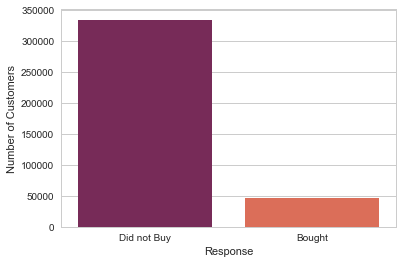

In [30]:
countPlot = sns.countplot(train['Response'], palette="rocket")
countPlot.set_ylabel('Number of Customers')
countPlot.set_xticklabels(['Did not Buy', 'Bought'], rotation=0 )
plt.show(countPlot)

In [13]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Distribution Plot of Ages of Customers

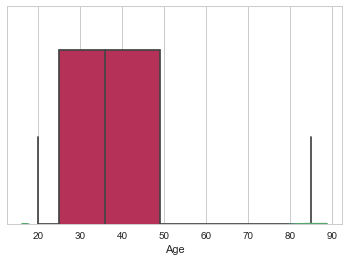

In [44]:
cnp1=sns.distplot(train['Age'])
plt.show(cnp1)

### Finding outliers by Age

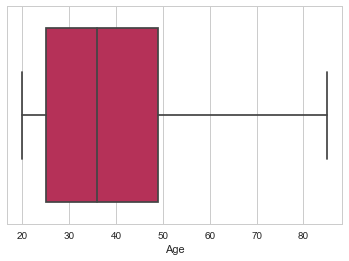

In [45]:
cnp2=sns.boxplot(x='Age', data=train, palette="rocket")
plt.show(cnp2)

## Comparing Age with Annual Premium

In [ ]:
cnp3=sns.scatterplot(x=train['Age'], y=train['Annual_Premium'], palette="rocket")
plt.show(cnp3)

## Comparision By Gender

In [17]:
sns.countplot(train['Gender'], palette = "rocket")

In [18]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

We have a slightly higher number of males than females in our training dataset

## Comparing their Responses (Responses based on Gender)

In [19]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

In [ ]:
g = sns.catplot(x="Gender", y="count",col="Response",data=df, kind="bar", palette="rocket");

## Comparing Driving licenses by Gender

In [21]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [22]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


In [ ]:
sns.catplot(x="Gender", y="Driving_License", data=df, kind="bar", palette="rocket");

## Customers who already have vehicle insurance

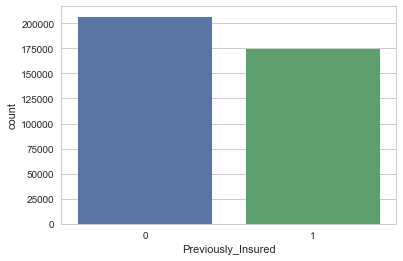

In [36]:
cnp4=sns.countplot(train.Previously_Insured)
plt.show(cnp4)

## Age of the Vehicle

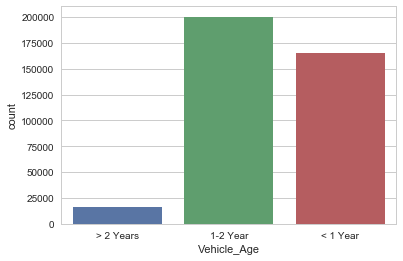

In [37]:
cnp5=sns.countplot(train.Vehicle_Age)
plt.show(cnp5)

## Response with respect to vehicle age

In [38]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


## Number of vehicles damaged

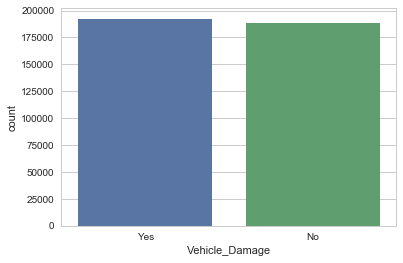

In [41]:
cnp6=sns.countplot(train.Vehicle_Damage)
plt.show(cnp6)

## Response with respect to vehicle damage

In [40]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


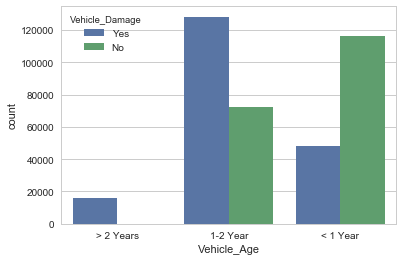

In [47]:
cnp7=sns.countplot('Vehicle_Age',hue='Vehicle_Damage',data=train)
plt.show(cnp7)

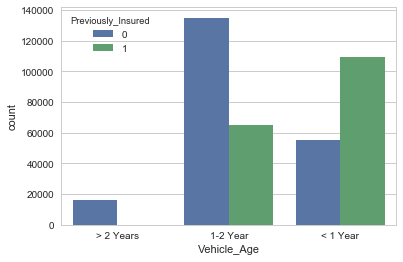

In [48]:
cnp8=sns.countplot('Vehicle_Age',hue='Previously_Insured',data=train)
plt.show(cnp8)

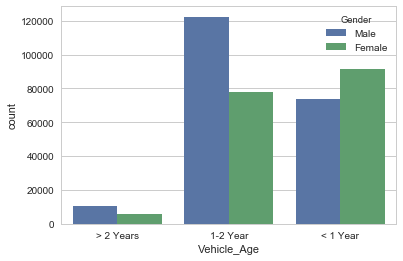

In [49]:
cnp9=sns.countplot('Vehicle_Age',hue='Gender',data=train)
plt.show(cnp9)